In [137]:
# 1. Design Your Study:

# Topic: The use of AI

# Define your population of interest:  people in my community.

# Determine what specific information you want to collect: I’d like to find out which AI service is the most popular, what purposes people use AI for, whether they trust it, and what concerns they have.
# To find any correlations between age and other variables.

# Questions: Language 
# 1. How often do you use AI-powered applications (e.g. ChatGPT, Midjourney, Google Gemini, etc.)?	
# 2. Which of the following AI tools have you used or are familiar with?	
# 3. In which areas do you use AI applications?	
# 4. What specific tasks do you most often use AI for?	
# 5. How much do you trust the results provided by AI tools?	
# 6. What concerns or risks do you associate with AI usage?	
# 7. You would be more likely to use AI tools if…	
# 8. Please select your age group

# For the survey I used google forms

In [138]:
# 2. Choose and Apply a Sampling Technique:

# Convenience sampling (e.g., surveying people who happen to be available) helped to conduct the survey in a short period of time.”

In [139]:
# 3. Analyze Your Results:

In [140]:
import re
import pandas as pd
import matplotlib.pyplot as plt

url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSxh1bA1tvfv8c0Pdq-wqXDzhaqiUbDW-j4pOdEP-7b6KlfeS3rXapAEzuptIOM9D-gAh9n4iYulptl/pub?output=csv"

df = pd.read_csv(url)
df.head()

,Timestamp,Language / Выберите язык,"1. How often do you use AI-powered applications (e.g. ChatGPT, Midjourney, Google Gemini, etc.)?",2. Which of the following AI tools have you used or are familiar with?,3. In which areas do you use AI applications?,4. What specific tasks do you most often use AI for?,5. How much do you trust the results provided by AI tools?,6. What concerns or risks do you associate with AI usage?,7. You would be more likely to use AI tools if…,8. Please select your age group,"1. Как часто вы используете приложения на основе Искусственного Интеллекта (например, ChatGPT, Midjourney, Google Gemini и т.д.)?",2. С какими ИИ-сервисами вы знакомы или когда-либо использовали?,3. В каких сферах вы используете ИИ-приложения?,4. Для каких конкретных задач вы чаще всего используете ИИ?,"5. Насколько вы доверяете результатам, полученным от ИИ-приложений?",6. Какие риски или опасения у вас вызывает использование ИИ?,"7. Вы бы хотели использовать ИИ чаще, если бы…",8. Выберите Вашу возрастную категорию
0,22/05/2025 14:05:38,Русский,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ежедневно,"ChatGPT (OpenAI), Gemini (Google), Copilot (Mi...","Учёба, Творчество (тексты, музыка, изображения...","Генерация текстов (статей, писем, постов), Пер...",9.0,Неправильная / недостоверная информация,Были бесплатные или более дешёвые версии,31 - 40
1,22/05/2025 14:05:40,English,Daily,"ChatGPT (OpenAI), Gemini (Google), Copilot (Mi...","Education / Studies, Creative tasks (writing, ...","Text generation (articles, emails, social medi...",9.0,Inaccurate or misleading information,There were free or more affordable versions,31 - 40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22/05/2025 14:26:02,English,Several times a week,"ChatGPT (OpenAI), Gemini (Google), DALL·E","Education / Studies, Creative tasks (writing, ...","Text generation (articles, emails, social medi...",5.0,"Inaccurate or misleading information, Overdepe...",There were free or more affordable versions,41 - 50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22/05/2025 14:27:47,English,Daily,"ChatGPT (OpenAI), Gemini (Google), Copilot (Mi...","Work, Education / Studies, Creative tasks (wri...","Text generation (articles, emails, social medi...",5.0,"Inaccurate or misleading information, Privacy ...",There were free or more affordable versions,31 - 40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22/05/2025 14:31:40,English,Daily,"ChatGPT (OpenAI), Gemini (Google), Deepseek, M...","Work, Education / Studies, Creative tasks (wri...","Text generation (articles, emails, social medi...",8.0,"Inaccurate or misleading information, Privacy ...","There were free or more affordable versions,",41 - 50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   Timestamp                                                                                                                          25 non-null     object 
 1   Language / Выберите язык                                                                                                           25 non-null     object 
 2   1. How often do you use AI-powered applications (e.g. ChatGPT, Midjourney, Google Gemini, etc.)?                                   4 non-null      object 
 3   2. Which of the following AI tools have you used or are familiar with?                      

In [142]:
# edit column names
df.columns = df.columns.str.strip()

column_groups = {}
for col in df.columns:
    prefix = col.split(".")[0] 
    column_groups.setdefault(prefix, []).append(col)

for prefix, cols in column_groups.items():
    if len(cols) > 1:  
        df[prefix] = df[cols[0]].combine_first(df[cols[1]])
        df.drop(columns=cols, inplace=True)  

df["Timestamp"] = pd.to_datetime(df["Timestamp"]).dt.strftime("%d/%m/%Y")
df.rename(columns={"Timestamp": "Date"}, inplace=True)


df.rename(columns={"Language / Выберите язык": "language",
                   "1" : "frequency",
                   "2" : "ai_names",
                   "3" : "domain",
                   "4" : "purpose",
                   "5" : "trust_level",
                   "6" : "concerns",
                   "7" : "incentive", 
                   "8" : "age"}, inplace=True)



/var/folders/hg/7_xt468j3nz1xqspwcc6s8jw0000gn/T/ipykernel_36670/2135734119.py:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Timestamp"] = pd.to_datetime(df["Timestamp"]).dt.strftime("%d/%m/%Y")


In [143]:
df = df.drop(index=df.index[0]) 
df.reset_index(drop=True, inplace=True)

In [144]:
# Clean and translate the frequency column
df["frequency"] = df["frequency"].str.replace("Ежедневно", "Daily")
df["frequency"] = df["frequency"].str.replace("Никогда", "Never")
df["frequency"] = df["frequency"].str.replace("Редко", "Rarely")
df["frequency"] = df["frequency"].str.replace("Несколько раз в неделю", "Weekly")

# language column
df["language"] = df["language"].str.replace("Русский",  "Russian")

In [145]:
# Clean and translate the ai_names column
df["ai_names"] = df["ai_names"].apply(lambda x: re.sub(r"\s*\(.*?\)", "", x))
phrases_to_remove = ["другие ИИ для текстов", "other writing assistants", "test"]

def clean_ai_names(text):
    for phrase in phrases_to_remove:
        text = re.sub(rf"\s*\b{phrase}\b,?", "", text)
    return text.strip()

df["ai_names"] = df["ai_names"].str.replace("Grammarly / DeepL Write", "Grammarly or DeepL")
df["ai_names"] = df["ai_names"].str.replace("Locally deployed models like SD", "Local AI Models (SD)")

df["ai_names"] = df["ai_names"].apply(clean_ai_names)
df["ai_names"] = df["ai_names"].str.replace("/", ",")
df["ai_names"] = df["ai_names"].str.replace("Не использую", "Don't use")
df["ai_names"] = df["ai_names"].str.rstrip(", ")


In [146]:
# Clean and translate the domain column

df["domain"] = df["domain"].apply(lambda x: re.sub(r"\s*\(.*?\)", "", x))
df["domain"] = df["domain"].str.replace("Учёба", "Education")
df["domain"] = df["domain"].str.replace("Education / Studies", "Education")
df["domain"] = df["domain"].str.replace("Работа", "Work")
df["domain"] = df["domain"].str.replace("Поиск информации", "Information search ")
df["domain"] = df["domain"].str.replace("Программирование / анализ данных", "Programming / Data Analysis")
df["domain"] = df["domain"].str.replace("Творчество", "Creative tasks")
df["domain"] = df["domain"].str.replace("Личностное развитие", "Personal growth")
df["domain"] = df["domain"].str.replace("Общение / развлечения", "Communication / Entertainment")
df["domain"] = df["domain"].str.replace("Не использую", "I don’t use AI")
  

# df["domain"] = df["domain"].str.replace("/", ",")
df["domain"] = df["domain"].str.rstrip(", ")

In [147]:
# Clean and translate the concerns column
df["purpose"] = df["purpose"].apply(lambda x: re.sub(r"\s*\(.*?\)", "", x))
df["purpose"] = df["purpose"].str.replace("Генерация текстов", "Text generation")
df["purpose"] = df["purpose"].str.replace("Я не использую ИИ для таких задач", "I don’t use AI for any of these tasks")
df["purpose"] = df["purpose"].str.replace("Переводы и проверка грамматики", "Translation and grammar checking")
df["purpose"] = df["purpose"].str.replace("Поиск идей или вдохновения", "Idea generation or inspiration")
df["purpose"] = df["purpose"].str.replace("Чат / поддержка / имитация общения", "Chatting or simulation of conversations")
df["purpose"] = df["purpose"].str.replace("Программирование / генерация кода", "Programming or code generation")
df["purpose"] = df["purpose"].str.replace("Краткие резюме текстов", "Text summarization")
df["purpose"] = df["purpose"].str.replace("Генерация изображений / видео", "Image or video generation")
df["purpose"] = df["purpose"].str.replace("/", "or")

In [148]:
# Clean and translate the concerns column

df["concerns"] = df["concerns"].str.replace("Неправильная / недостоверная информация", "Inaccurate or misleading information")
df["concerns"] = df["concerns"].str.replace("Зависимость от технологий", "Overdependence on technology")
df["concerns"] = df["concerns"].str.replace("Потеря рабочих мест", "Job displacement")
df["concerns"] = df["concerns"].str.replace("Моральные / этические вопросы", "Ethical or moral concerns")
df["concerns"] = df["concerns"].str.replace("Нет особых опасений", "No major concerns")
df["concerns"] = df["concerns"].str.replace("Нарушение конфиденциальности", "Privacy violations")

In [149]:
# Clean and translate the incentive column
df["incentive"] = df["incentive"].str.replace("Результаты работы ИИ были бы неотличимы от работы выполненной человеком", "The results produced by AI would be indistinguishable from those created by a human")
df["incentive"] = df["incentive"].str.replace("Были бесплатные или более дешёвые версии", "There were free or more affordable versions")
df["incentive"] = df["incentive"].str.replace("Не хочу использовать ИИ чаще", "I’m not interested in using AI more")
df["incentive"] = df["incentive"].str.replace("Можно было бы использовать на родном языке", "They supported my native language")
df["incentive"] = df["incentive"].str.replace("Было больше информации / обучения", "There were more learning resources or guidance")
df["incentive"] = df["incentive"].str.replace("Был понятный пользовательский интерфейс", "The interface was easier to use")

In [150]:
df["age"] = df["age"].str.replace("<= 21", "16-21")

In [151]:
df

,Date,language,frequency,ai_names,domain,purpose,trust_level,concerns,incentive,age
0,22/05/2025,English,Daily,"ChatGPT, Gemini, Copilot, Deepseek, Midjourney...","Education, Creative tasks, Information search","Text generation, Translation and grammar check...",9.0,Inaccurate or misleading information,There were free or more affordable versions,31 - 40
1,22/05/2025,English,Several times a week,"ChatGPT, Gemini, DALL·E","Education, Creative tasks, Programming / Data ...","Text generation, Idea generation or inspiratio...",5.0,"Inaccurate or misleading information, Overdepe...",There were free or more affordable versions,41 - 50
2,22/05/2025,English,Daily,"ChatGPT, Gemini, Copilot, Deepseek, Midjourney...","Work, Education, Creative tasks, Communication...","Text generation, Translation and grammar check...",5.0,"Inaccurate or misleading information, Privacy ...",There were free or more affordable versions,31 - 40
3,22/05/2025,English,Daily,"ChatGPT, Gemini, Deepseek, Midjourney, DALL·E,...","Work, Education, Creative tasks, Communication...","Text generation, Translation and grammar check...",8.0,"Inaccurate or misleading information, Privacy ...","There were free or more affordable versions,",41 - 50
4,22/05/2025,Russian,Daily,"ChatGPT, Gemini, Copilot, Deepseek, Midjourney...","Work, Education, Programming / Data Analysis, ...","Text generation, Translation and grammar check...",8.0,Inaccurate or misleading information,There were more learning resources or guidance,41 - 50
5,22/05/2025,Russian,Daily,"ChatGPT, Gemini","Education, Information search","Translation and grammar checking, Text summari...",7.0,"Inaccurate or misleading information, Overdepe...",The results produced by AI would be indistingu...,31 - 40
6,22/05/2025,Russian,Never,"ChatGPT, Midjourney",Communication / Entertainment,I don’t use AI for any of these tasks,4.0,"Inaccurate or misleading information, Privacy ...",There were free or more affordable versions,31 - 40
7,22/05/2025,Russian,Daily,"ChatGPT, Gemini, Midjourney, DALL·E, Grammarly...","Work, Education, Creative tasks, Programming /...","Text generation, Image or video generation, Pr...",6.0,"Inaccurate or misleading information, Job disp...","There were free or more affordable versions, T...",31 - 40
8,22/05/2025,Russian,Daily,"ChatGPT, Gemini, Copilot, Deepseek","Education, Communication / Entertainment, Info...","Translation and grammar checking, Idea generat...",6.0,"Inaccurate or misleading information, No major...",There were more learning resources or guidance...,41 - 50
9,22/05/2025,Russian,Daily,"ChatGPT, Gemini, Midjourney, Suno","Work, Education, Creative tasks, Programming /...","Text generation, Translation and grammar check...",8.0,"Inaccurate or misleading information, Privacy ...","There were free or more affordable versions, T...",31 - 40


In [152]:
df.head()

,Date,language,frequency,ai_names,domain,purpose,trust_level,concerns,incentive,age
0,22/05/2025,English,Daily,"ChatGPT, Gemini, Copilot, Deepseek, Midjourney...","Education, Creative tasks, Information search","Text generation, Translation and grammar check...",9.0,Inaccurate or misleading information,There were free or more affordable versions,31 - 40
1,22/05/2025,English,Several times a week,"ChatGPT, Gemini, DALL·E","Education, Creative tasks, Programming / Data ...","Text generation, Idea generation or inspiratio...",5.0,"Inaccurate or misleading information, Overdepe...",There were free or more affordable versions,41 - 50
2,22/05/2025,English,Daily,"ChatGPT, Gemini, Copilot, Deepseek, Midjourney...","Work, Education, Creative tasks, Communication...","Text generation, Translation and grammar check...",5.0,"Inaccurate or misleading information, Privacy ...",There were free or more affordable versions,31 - 40
3,22/05/2025,English,Daily,"ChatGPT, Gemini, Deepseek, Midjourney, DALL·E,...","Work, Education, Creative tasks, Communication...","Text generation, Translation and grammar check...",8.0,"Inaccurate or misleading information, Privacy ...","There were free or more affordable versions,",41 - 50
4,22/05/2025,Russian,Daily,"ChatGPT, Gemini, Copilot, Deepseek, Midjourney...","Work, Education, Programming / Data Analysis, ...","Text generation, Translation and grammar check...",8.0,Inaccurate or misleading information,There were more learning resources or guidance,41 - 50


# **Plots**

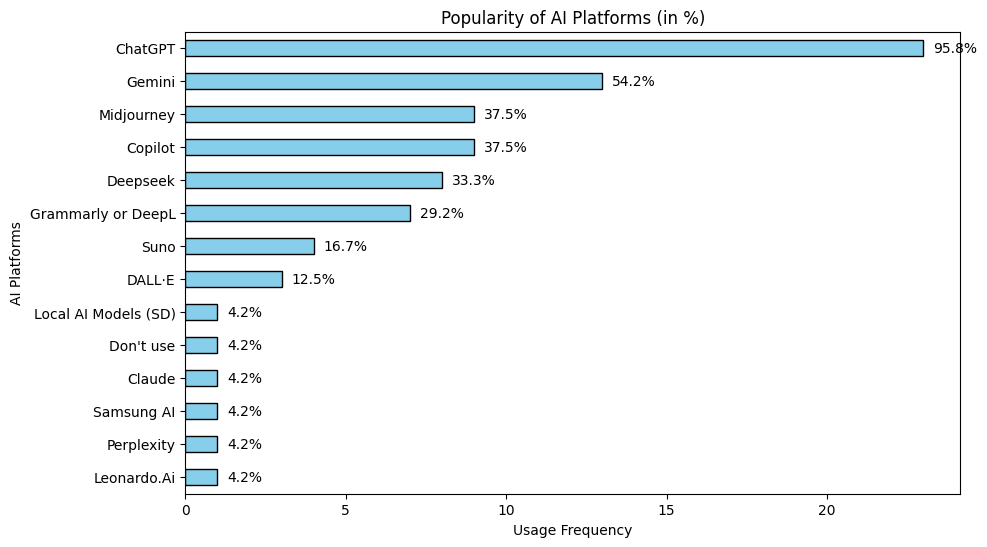

In [153]:
# 1. The most popular and frequently used AI tools
df_exploded = df["ai_names"].str.split(",").explode().str.strip()
df_exploded = df_exploded.reset_index(drop=True)
ai_counts = df_exploded.value_counts().sort_values(ascending=True)  # Sort in ascending order for barh

# Calculate percentages
total_responses = len(df)
ai_percentages = (ai_counts / total_responses * 100).round(1)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
bars = ai_counts.plot(kind="barh", color="skyblue", edgecolor="black")

# Add percentage labels slightly further from bars
for bar, percent in zip(bars.patches, ai_percentages):
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, f"{percent}%", va="center", fontsize=10, color="black") 

plt.ylabel("AI Platforms")
plt.xlabel("Usage Frequency")
plt.title("Popularity of AI Platforms (in %)")
plt.show()

<Figure size 1200x500 with 0 Axes>

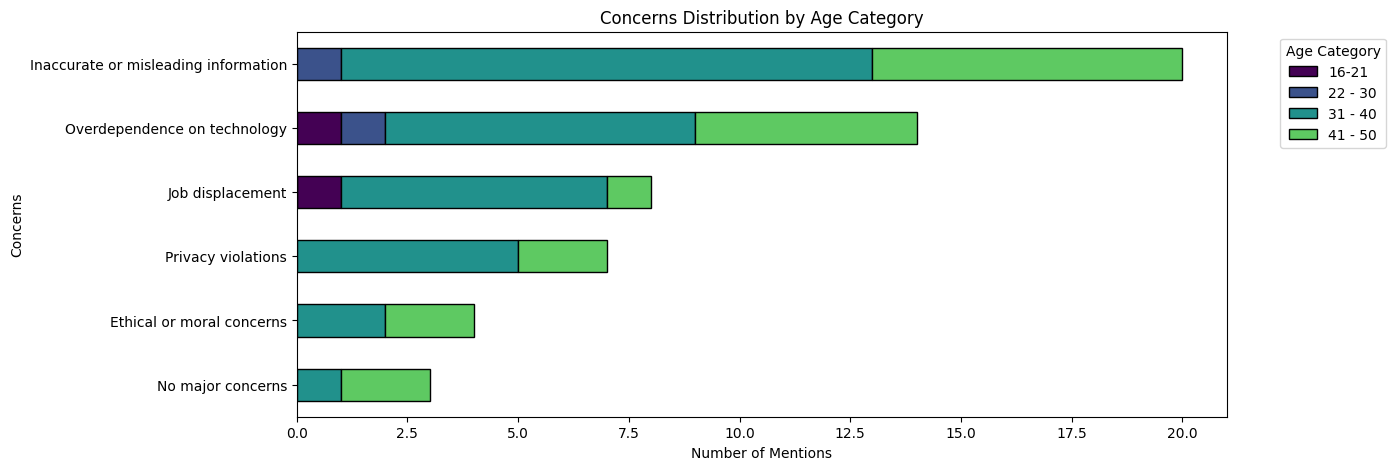

In [154]:
# 2. Top concerns mentioned by respondents, split by age
df_concerns = df[["concerns", "age"]].dropna().copy()

df_concerns_exploded = df_concerns.assign(concerns=df_concerns["concerns"].str.split(",")).explode("concerns")
df_concerns_exploded["concerns"] = df_concerns_exploded["concerns"].str.strip()

concerns_by_age = df_concerns_exploded.groupby(["concerns", "age"]).size().unstack(fill_value=0)

concerns_by_age = concerns_by_age.loc[concerns_by_age.sum(axis=1).sort_values(ascending=True).index]

ordered_age_cols = sorted(concerns_by_age.columns)
concerns_by_age = concerns_by_age[ordered_age_cols]


n_age_groups = len(ordered_age_cols)

colors = [cm.viridis(i / (n_age_groups )) for i in range(n_age_groups)]

plt.figure(figsize=(12, 5))
ax = concerns_by_age.plot(kind="barh", stacked=True, figsize=(12, 5), color=colors, edgecolor="black")

plt.xlabel("Number of Mentions")
plt.ylabel("Concerns")
plt.title("Concerns Distribution by Age Category")
plt.legend(title="Age Category", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


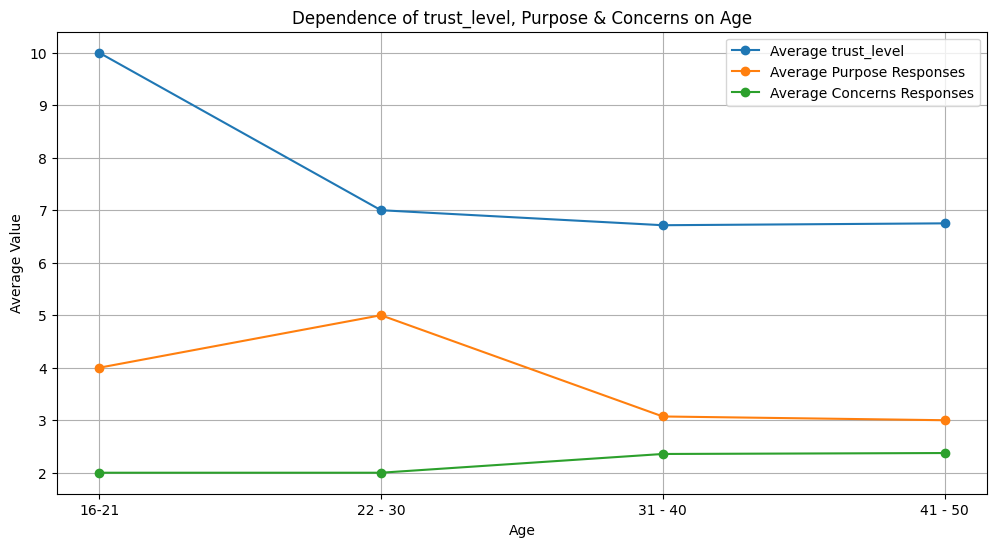

In [155]:
# 3. Changes in trust levels, purposes of use, and concerns across age groups
trust_level_by_age = (
    df.dropna(subset=["trust_level", "age"])
      .groupby("age")["trust_level"]
      .mean()
      .sort_index()
)

df_purpose = df.dropna(subset=["purpose", "age"]).copy()
df_purpose["purpose_count"] = df_purpose["purpose"].str.split(",").apply(lambda x: len(x))
purpose_avg_by_age = df_purpose.groupby("age")["purpose_count"].mean().sort_index()

df_concerns = df.dropna(subset=["concerns", "age"]).copy()
df_concerns["concerns_count"] = df_concerns["concerns"].str.split(",").apply(lambda x: len(x))
concerns_avg_by_age = df_concerns.groupby("age")["concerns_count"].mean().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(trust_level_by_age.index, trust_level_by_age.values, marker='o', label='Average trust_level')
plt.plot(purpose_avg_by_age.index, purpose_avg_by_age.values, marker='o', label='Average Purpose Responses')
plt.plot(concerns_avg_by_age.index, concerns_avg_by_age.values, marker='o', label='Average Concerns Responses')

plt.xlabel("Age")
plt.ylabel("Average Value")
plt.title("Dependence of trust_level, Purpose & Concerns on Age")
plt.legend()
plt.grid(True)
plt.show()


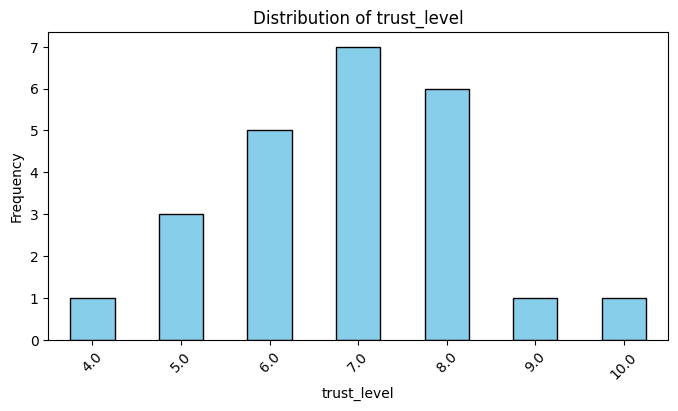

In [156]:
# 4. Distribution of trust level

plt.figure(figsize=(8, 4))
df["trust_level"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("trust_level")  
plt.ylabel("Frequency")  
plt.title("Distribution of trust_level")  
plt.xticks(rotation=45)  

plt.show()

In [157]:
trust_level_sample = df["trust_level"].dropna()
n = trust_level_sample.shape[0]

# Standard Deviation
std = trust_level_sample.std()

z = 1.96

# Calculation of the Margin of Error (MOE)
moe = z * std / np.sqrt(n)

# Calculate the mean value for reference
mean_val = trust_level_sample.mean()

print("Sample size (n):", n)
print("Mean value:", mean_val)
print("Standard Deviation:", std)
print("Margin of Error (MOE, 95% CI):", moe)


Sample size (n): 24
Mean value: 6.875
Standard Deviation: 1.3929168644626095
Margin of Error (MOE, 95% CI): 0.5572828101016418


In [158]:
# Based on our calculations, the sample of 24 respondents yielded an average trust_level score of 6.875, with a standard deviation of approximately 1.393, indicating moderate variability in ratings. 
# The margin of error is about 0.557 at a 95% confidence level, suggesting that the true mean likely falls between 6.318 and 7.432. These results point to a moderately trust_level level overall, but the small sample size calls for cautious generalization to a broader population.

In [159]:
# 4. Evaluate Sampling Error:

In [160]:
# Let's calculate the required sample size for a 95% confidence level and 5% margin of error, based on the proportion of respondents who expressed concerns about AI usage.
# Determine the proportion of respondents who expressed at least one concern

concerns_sample = df["concerns"].dropna()
p = (concerns_sample.apply(lambda x: x.strip() != "No major concerns").sum()) / concerns_sample.shape[0]

# Current sample size
n_current = concerns_sample.shape[0]

# Critical value for a 95% confidence interval
z = 1.96

# Margin of error (E)
E = 0.05

# Calculate the required sample size
n_required = (z**2 * p * (1 - p)) / (E**2)
n_required = round(n_required)

# Print results
print(f"Current sample size: {n_current}")
print(f"Estimated proportion of respondents with concerns (p): {p:.4f}")
print(f"Required sample size for E={E}: {n_required}")


Current sample size: 24
Estimated proportion of respondents with concerns (p): 0.9167
Required sample size for E=0.05: 117


In [161]:
# Identify at least three potential sources of sampling error in your study: 

# ### Potential Sources of Sampling Error
# 1. Selection Bias (Limited Diversity of Respondents)
#   I sent the survey link only to my friends, which limits the sample to specific groups of people. This means that the results may reflect opinions of individuals with similar interests or educational backgrounds rather than the general population.

# 2. Self-Selection Bias (Only Interested Respondents Answered)

#   Not everyone who received the survey link chose to participate—only those who were interested in the topic. As a result, the data may not objectively represent the overall perception of AI, since responses from people who are indifferent to the technology are missing.

# 3. Coverage Bias (Lack of Representativeness)  
#   The sample consists only of my friends, which does not provide a broad demographic spectrum (e.g., different age groups, professions, or cultural backgrounds). This could make the results inapplicable to the wider population, as they reflect the opinions of a limited circle of people.

In [162]:
# Describe how these errors might affect your results

# 1. Overly Positive Perception of AI — If many of your friends are from the Data Science field, they may be more favorable toward AI technologies, which could distort the true public sentiment.

# 2. Low Level of Criticism — If few people with negative opinions about AI participated, the results might underestimate real concerns about the technology.

# 3. Biased Conclusions — For instance, people studying German might see AI as a useful translation tool, leading to different attitudes compared to those who rarely interact with AI.

In [163]:
# Suggest ways to minimize these errors in future studies


# 1. Expanding the Sample Increase the number of respondents to ensure a more diverse and representative dataset.

# 2. Using Quota Sampling Identify key groups that should be equally represented (e.g., age distribution, level of technical literacy) to avoid skewed results.

# 3. Utilizing Additional Data Collection Methods Compare collected data with other studies to verify whether the findings align with global trends.